In [2]:
import sys
!{sys.executable} -m pip install empiricaldist
from datetime import datetime
import numpy as np

import pandas as pd
from utils import helpers
from utils.dist_helpers import ecdf, dv_ecdf, ecdf_plot_major_incidents, dv_ecdf_all_days, pmf_plots_dt, pmf_data_incidents_by_day, pmf_data_incidents_by_hour, clustered_incidents_plt

  Preparing metadata (setup.py) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.6.2-py3-none-any.whl size=10733 sha256=99f8bd5df6e70376c934cbcc0df16633977462def493526bafd2ebbba590c146
  Stored in directory: /home/repl/.cache/pip/wheels/2a/ed/75/39cda0596e8f5606df54fb63969c565b49d23869ee64a62435
Successfully built empiricaldist


Loading datasets
Importing functions from intenal workspace (utils)

In [3]:
df_casualties,df_vehicles,df_incidents = helpers.data_collection()
df, df1, df2, df1_none_major, df2_major_incidents = helpers.data_preparation(
    df_casualties,
    df_vehicles,
    df_incidents
)

## 1. What time of day and what day of week do most major incidents happen?
PMF analysis showing days of week & hours of the day for major incidents. 
Most major incidents are occuring on 6th and 7th days from the 15th hour to the 17th hour. 

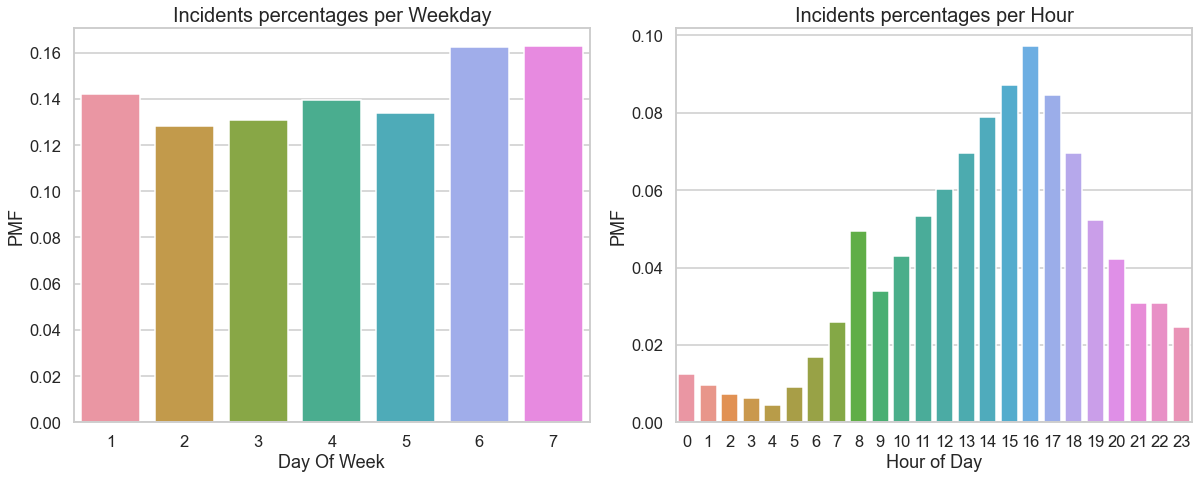

In [4]:
df = df2_major_incidents
df['time'] = pd.to_datetime(df['time']).dt.strftime("%H").astype(int)

pmf_plots_dt(
    'days', 'accidents', pmf_data_incidents_by_day(df),
    'Incidents percentages per Weekday', 'Day Of Week', 'PMF',
    'times', 'accidents',pmf_data_incidents_by_hour(df),
    'Incidents percentages per Hour', 'Hour of Day', 'PMF'
)

### 2. Are there any patterns in the time of day/ day of the week when major incidents occur?

Ecdf analysis showing patterns of the spread of major incidents thru each weekday and on major holidays. 

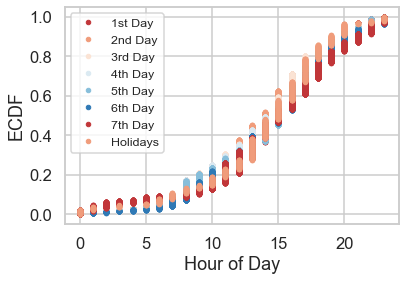

In [5]:
ecdf_plot_major_incidents(df2)

### 3. What characteristics stand out in major incidents compared with other accidents?

In [6]:
km, df_with_cluster = helpers.get_clusters(df1_none_major=df)

When analyzing our clusters it appears to show differences in the road surface condition and weather condition columns within the incidents types.

In [6]:
helpers.get_cluster_table_1(
    km, 
    df_with_cluster
)

,road_surface_conditions,weather_conditions,time,day_of_week,fm,ml
0,2.018259,1.620525,14.215326,4.153625,7346.0,3342.0
1,1.861150,6.838710,13.891538,4.010753,1441.0,630.0
2,0.997350,1.007713,14.097246,4.135482,13787.0,6404.0


Our clusters also shows differences in Special condion at site & Carriageway hazards columns.

In [7]:
helpers.get_cluster_table_2(
    km, 
    df_with_cluster
)

,special_conditions_at_site,carriageway_hazards,time,day_of_week,fm,ml
0,0.156233,0.103976,14.215326,4.153625,7346.0,3342.0
1,0.169705,0.171108,13.891538,4.010753,1441.0,630.0
2,0.098240,0.061045,14.097246,4.135482,13787.0,6404.0


The light condition in both major and none major incidents our clusters stands out from other columns.

In [7]:
helpers.get_cluster_table_3(
    km, 
    df_with_cluster
)

,light_conditions,urban_or_rural_area,time,day_of_week,fm,ml
0,2.632308,1.549379,14.215326,4.153625,7346.0,3342.0
1,2.913043,1.617111,13.891538,4.010753,1441.0,630.0
2,1.826424,1.531469,14.097246,4.135482,13787.0,6404.0


### 4. On what areas would you recommend the planning team focus their brainstorming efforts to reduce major incidents?
MY recommendation for the planning team in their efforts to reduce major incidents is to brainstorming on these key problematic areas I encounter in my research efforts.

- Days of week, day 6 and day 7.
- Hours of the day, 12th hour to the 18th hour.
- Hours of the day, the 5th to the 7the hour.
- Road conditions in cohost with weather tandem conditions
- Special conditions sites and carriageway hazards